In [1]:
from keras.datasets import mnist

In [2]:
from keras.utils import np_utils

In [17]:
import numpy as np
import keras

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_datad_data()

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

NameError: name 'train_X' is not defined

In [4]:
from matplotlib import pyplot

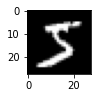

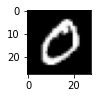

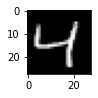

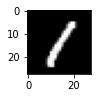

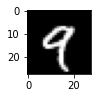

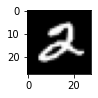

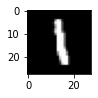

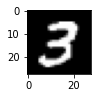

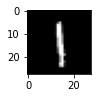

In [9]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [14]:
x_train = np.array(train_X)
y_train = np.array(train_y)

#x_val = np.array(x_val)
#y_val = np.array(y_val)

x_test = np.array(test_X)
y_test = np.array(test_y)


In [16]:
print(x_train.shape)
print(y_train.shape)
#print(x_val.shape)
#print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print("---")
print(x_train[0].shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
---
(28, 28)


In [6]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

DATASET_SIZE = 70000
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.1

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

In [8]:
x_train = np.array(X_train)
y_train = np.array(y_train)

x_val = np.array(X_val)
y_val = np.array(y_val)

x_test = np.array(X_test)
y_test = np.array(y_test)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print("---")
print(x_train[0].shape)


(48999, 28, 28)
(48999,)
(14000, 28, 28)
(14000,)
(7001, 28, 28)
(7001,)
---
(28, 28)


In [10]:
img_width, img_height = 28,28

In [11]:
num_classes = 10

In [12]:
x_train[0].max()

255

In [13]:
x_train = x_train.reshape(-1, img_width, img_height, 1)
x_test = x_test.reshape(-1, img_width, img_height, 1)
x_val = x_val.reshape(-1, img_width, img_height, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_val = x_val.astype("float32")

x_train = (x_train / 255.0) 
x_test = (x_test / 255.0)
x_val = (x_val / 255.0)


y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

In [14]:
x_train[0].max()

1.0

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print("---")
print(x_train[0].shape)


(48999, 28, 28, 1)
(48999, 10)
(14000, 28, 28, 1)
(14000, 10)
(7001, 28, 28, 1)
(7001, 10)
---
(28, 28, 1)


## Training a CNN model

In [18]:
num_classes

10

In [ ]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [57]:

model = keras.models.Sequential([
                                 keras.layers.Conv2D(28, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(28, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                   
                                 keras.layers.Dropout(0.2), 

                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 
                                 keras.layers.Dropout(0.2),

                                 keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(128, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 
                                 keras.layers.Dropout(0.2),

                                 keras.layers.Flatten(), 
                                 keras.layers.Dense(512, activation= 'relu'), 
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(256, activation= 'relu'), 
                                 
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(10, activation = 'softmax')
])

In [58]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']) #change adam

In [59]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    shuffle=True,
    validation_data=(x_val, y_val),
)

Epoch 1/10
766/766 [==============================] - 234s 230ms/step - loss: 0.7620 - accuracy: 0.7351 - val_loss: 0.0615 - val_accuracy: 0.9819
Epoch 2/10
766/766 [==============================] - 184s 240ms/step - loss: 0.0842 - accuracy: 0.9766 - val_loss: 0.0580 - val_accuracy: 0.9839
Epoch 3/10
766/766 [==============================] - 178s 232ms/step - loss: 0.0692 - accuracy: 0.9827 - val_loss: 0.0397 - val_accuracy: 0.9894
Epoch 4/10
766/766 [==============================] - 181s 237ms/step - loss: 0.0633 - accuracy: 0.9845 - val_loss: 0.0520 - val_accuracy: 0.9868
Epoch 5/10
766/766 [==============================] - 167s 218ms/step - loss: 0.0696 - accuracy: 0.9830 - val_loss: 0.0645 - val_accuracy: 0.9864
Epoch 6/10
766/766 [==============================] - 134s 175ms/step - loss: 0.0697 - accuracy: 0.9839 - val_loss: 0.0737 - val_accuracy: 0.9824
Epoch 7/10
766/766 [==============================] - 129s 169ms/step - loss: 0.0727 - accuracy: 0.9834 - val_loss: 0.0602 -

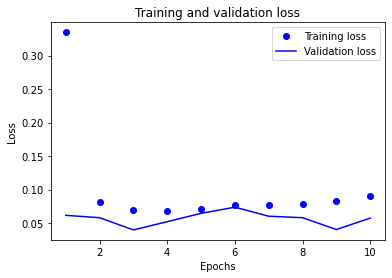

In [60]:
# plotting training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

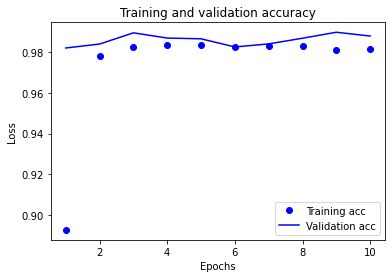

In [61]:
# Plotting training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
model.save("C:/Users/fjdur/Documents/CIFAR project/models")


INFO:tensorflow:Assets written to: C:/Users/fjdur/Documents/CIFAR project/models\assets


In [64]:
# Loading model already trained
model_dir = "C:/Users/fjdur/Documents/CIFAR project/models"
model_1 = keras.models.load_model(model_dir)

In [65]:
results = model_1.evaluate(x_test,y_test)

219/219 [==============================] - 4s 16ms/step - loss: 0.0615 - accuracy: 0.9883


In [20]:
#30/06
model_2 = keras.models.Sequential([
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                   
                                 keras.layers.Dropout(0.25), 

                                 keras.layers.Flatten(), 
                                 keras.layers.Dense(128, activation= 'relu'), 
                                 keras.layers.Dropout(0.5), 
                                 
                                 keras.layers.Dense(10, activation = 'softmax')
])

In [21]:
model_2.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']) #change adam

In [22]:
history = model_2.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    shuffle=True,
    validation_data=(x_val, y_val),
)

Epoch 1/10
766/766 [==============================] - 137s 116ms/step - loss: 0.4272 - accuracy: 0.8648 - val_loss: 0.0877 - val_accuracy: 0.9741
Epoch 2/10
766/766 [==============================] - 89s 117ms/step - loss: 0.0894 - accuracy: 0.9740 - val_loss: 0.0645 - val_accuracy: 0.9801
Epoch 3/10
766/766 [==============================] - 88s 115ms/step - loss: 0.0642 - accuracy: 0.9815 - val_loss: 0.0563 - val_accuracy: 0.9839
Epoch 4/10
766/766 [==============================] - 87s 114ms/step - loss: 0.0584 - accuracy: 0.9828 - val_loss: 0.0565 - val_accuracy: 0.9837
Epoch 5/10
766/766 [==============================] - 90s 117ms/step - loss: 0.0610 - accuracy: 0.9831 - val_loss: 0.0555 - val_accuracy: 0.9839
Epoch 6/10
766/766 [==============================] - 84s 110ms/step - loss: 0.0617 - accuracy: 0.9840 - val_loss: 0.0607 - val_accuracy: 0.9844
Epoch 7/10
766/766 [==============================] - 83s 108ms/step - loss: 0.0716 - accuracy: 0.9816 - val_loss: 0.0815 - val_a

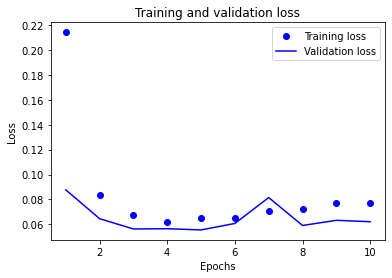

In [23]:
# plotting training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

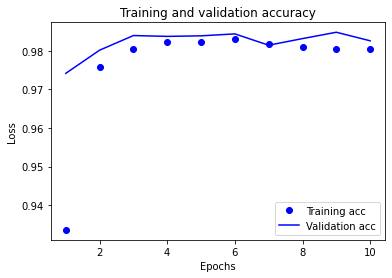

In [24]:
# Plotting training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
model_2.save("C:/Users/fjdur/Documents/CIFAR project/models2")


INFO:tensorflow:Assets written to: C:/Users/fjdur/Documents/CIFAR project/models2\assets


In [28]:
results = model_2.evaluate(x_test,y_test)

219/219 [==============================] - 3s 14ms/step - loss: 0.0547 - accuracy: 0.9847
